```zsh
% pip install numpy
% pip install scipy
% pip install matplotlib
```

## 離散型確率分布

### ポアソン分布（poisson distribution）

ある期間に平均 $ \lambda $ 回起こる事象 $X$ が $ k $ 回起こる確率

$$
P(X=k)=\frac{e^{-\lambda}\lambda^k}{k!}
$$

>ベルヌーイ試行のうち $n$ が十分大きく、 確率 $p$ が非常に小さい時、事象 $X$ の期待値 $E(X)$ は『 $np = \lambda $（一定）』と考えることができる。このとき、事象 $X$ が発生する回数 $k$ は**ポアソン分布**に従う。つまり、ポアソン分布は『ある期間に平均 $\lambda$ 回発生する事象が、ある期間に $k$ 回発生する確率分布』と言い換えられる。

- 期待値　 : $E(X) = \lambda$
- 標準偏差 : $Std(X) = \sqrt{\lambda}$

---

e.g. 
- 1時間に平均5回アクセスされるサイトが10回アクセスされる確率
$$
P(X=10) = \frac{e^{-5}\times5^{10}}{10!} \fallingdotseq 0.018
$$


- 100個に1個の当たりのあるお菓子を10個買った時に、当たりのお菓子が2個含まれる場合の確率
$$
P(X=2) = \frac{e^{-0.1}\times{0.1}^2}{2!} \fallingdotseq 0.0045
$$

#### モジュールのインポートと初期設定

In [10]:
import numpy as np
from scipy.stats import poisson
import matplotlib as mpl
import matplotlib.pyplot as plt

# fivethirtyeightスタイルを使う
mpl.style.use(style='fivethirtyeight')

# Jupyter Notebookに描画する
%matplotlib inline

#### 確率質量関数（probability mass function, PMF）

e.g. 1か月に平均2回外食する人が5回外食する確率

In [43]:
# 期待値λ
mu = 2

# 回数k
k = 5

print(f'{poisson.pmf(k, mu):.2%}')

3.61%


#### パーセント点関数（percent point function, PPF）

e.g. 1か月に平均2回外食する人の母平均 $\mu$ の95%信頼区間を求める

In [40]:
print(f'{poisson.ppf(0.025, mu):.0f} <= μ <= {poisson.ppf(0.975 , mu):.0f}')

0 <= μ <= 5


#### 累積分布関数（cumulative density function, CDF）

e.g. 1か月に平均2回外食する人が0〜3回外食する確率

In [46]:
mu = 2
k = 3
print(f'{poisson.cdf(k, mu):.2%}')

85.71%


#### 生存関数（survival function, SF）
e.g. 1か月に平均2回外食する人が3回より多く外食する確率

In [61]:
mu = 2
k = 3
print(f'{poisson.sf(k, mu):.2%}')

14.29%


#### ポアソン分布（確率質量関数）の可視化

e.g. 1か月に平均2回外食する人のポアソン分布をプロットする

[Text(0, 0.5, 'probability'), Text(0.5, 0, 'k'), Text(0.5, 1.0, 'Poisson PMF')]

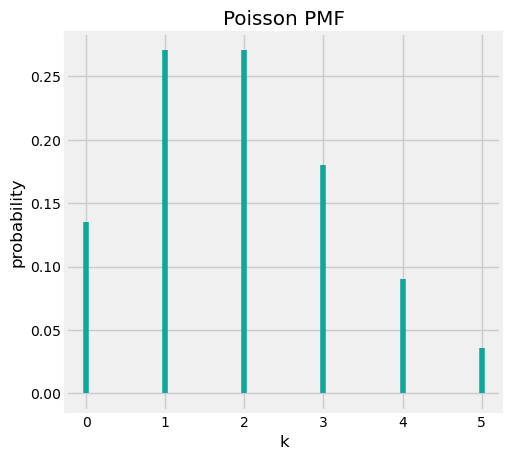

In [69]:
mu = 2
k = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.vlines(k, 0, poisson.pmf(k, mu), colors='#0EA89B')
ax.set(title='Poisson PMF', xlabel='k', ylabel='probability')